<a href="https://colab.research.google.com/github/martha-irungu/KNN_and_Naive_Bayes/blob/master/Week9_Core_IP_Titanic_Dataset__Martha_Irungu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question

a) Specifying the question

The objective of this study is to use the Titanic dataset and to accomplish the following:  

i)Using the Titanic dataset, build a model that classifies whether or not the passengers on board the Titanic survived or did not survive.


To implement this, we will apply the following algorithim:

*   KNearest Neighbours(KNN)


ii)Suggest and apply at least one of the optimization techniques.

iii)Compare the performance of the models and state your conclusion and Provide further recommendations to improve both classifiers.


**b)Defining the Metrics for success**

To meet the objective of the study we will create the above mentioned models and assess suitability of each of the tested models on their appropriateness to solve the given problem. 

We will subject the evaluation to the assumptions of each model, the features that important to the model and compare performance based on metrics such as accuracy scores, confusion matrix and make our conlusion. We will aim at an accuracy of 80% and above.


**c) Understanding the context**
* Titanic dataset

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, although Titanic had advanced safety features, such as watertight .

The ship's passengers were divided into three separate classes determined by the price of their ticket: those travelling in first class, most of them the wealthiest passengers on board, included prominent members of the upper class, businessmen, politicians, high-ranking military personnel, industrialists, bankers, entertainers, socialites, and professional athletes. Second-class passengers were predominantly middle-class travellers and included professors, authors, clergymen, and tourists. Third-class or steerage passengers were primarily immigrants moving to the United States and Canada.


**d) Recording the experimental design**

The following steps were implemented

1.) Business Understanding.

2.) Reading the data.

3.) Data Exploration and cleaning to prepare the data for modelling

4.) Univariate,Bivariate analysis

5.) Multivariate analysis.

6.) Implementing the model/s

7.) Challenging the solution

8.) Conclusion

**e)Data Relevance**

The data provided for this study consists of columns with information about passengers whow were on board Titanic. The dataset is relevant and we have validated the description and the details of the columns as per wikipedia link below and have found it authentic.

https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic


# 2. Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


#3. Reading and checking the data

In [ ]:
#Previewing the first 5 columns of the train dataset
train= pd.read_csv('train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test= pd.read_csv('test.csv')

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Previewing the last 5 columns of the train  dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#Checking the shape of our train dataset
train.shape 

(891, 12)

In [ ]:
#Checking the shape of our test dataset
test.shape  

(418, 11)

We have 891 records and 12 columns in the train dataset and 418 records and 11 columns in the test dataset

In [ ]:
#Checking the columns in our dataset
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


*Below is a brief description of the columns in our datasets.Train and test have the same columns save for the target column(survived) that in train dataset. 

* Passanger ID: This identifies the passengers
* Survived: This represents the passangers who survived and  those who did not survive. 0: Those who did not survive and 1:passengers who survived.
* Pcclass: This represents the passenger class, there are 3 Passenger Classes:  (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name: Name of the passenger
* Sex: Gender of the passenger female or male
* Age: This is the age of the passengers on board
* SibSp: This column captures details of passengers who had siblings and or spouses aboard.These were defined as follows:
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch:  Number of Parents/Children Aboard, defines family relations in this way;
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: This is the ticket number
* Fare: This is the amount of fare that the passenger paid 
* Cabin: Cabin
* Embarked: Port of Embarkation. This is the geographic point in a routing scheme from which cargo or personnel depart. In this dataset there were 3 ports of embarkation:(C = Cherbourg; Q = Queenstown; S = Southampton)




In [ ]:
#Checking the datatypes
print(train.dtypes)

print(test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Columns are in float, object and integer datatypes in both datasets.

# 4. Data cleaning and exploration

In [ ]:
#get to know unique values in each column

train_columns = train.columns.to_list()

for column in train_columns:
    print("\n")
    print("Column Name:", column)
    print(train[column].unique())



Column Name: PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240

We observe that the columns in the dataset have float values, categorical values,investigate each and its value in helping us implement our solution. We note that some have null values which needs to be addressed. 

In [ ]:
#Checking for null values
print(train.isnull().sum())

print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


train dataset

We observe that 3 out of 12 columns have missing values in training dataset.Cabin has the highest null values with 687, Age has 177 missing values and Embarked has 2 null values.

test dataset
We observe that 3 out of 11 columns have missing values in test dataset.Cabin has the highest null values with 327, Age has 86 missing values and Fare has 1 null values.


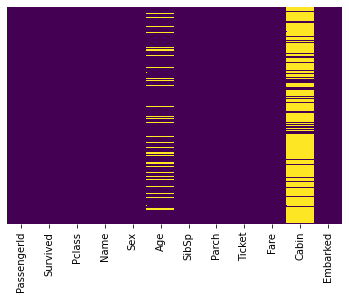

In [ ]:
import seaborn as sns
#Visualizing null values 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

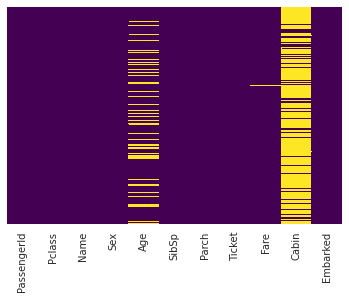

In [ ]:
import seaborn as sns
#Visualizing null values 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Visualization of the null values

*Dealing with missing values: *

Dropping them

This is the fastest and easiest step to handle missing values. However this method reduces the quality of our model as it reduces sample size because it works by deleting all other observations where any of the variable is missing.

Filling them with test statistics. This is where the missing values are replaced with a test statistic like mean, median or mode of the particular feature the missing value belongs to. One can also specify a forward-fill or back-fill to propagate the next values backward or previous value forward.

*Actions for our dataset
1. We will replace the missing values of Age column with the mean age of that column.
2. We will drop the cabin column as it has 687 missing values out of the possible 891, these are way too high for fill additionally this column may not influence what we are predicting as much.
3. We will replace the missing values of embarked column with mode-the number that appears more frequently in the dataset, since this column is categorical reprenting 3 ports(Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton))
4. We will apply this to both the train and the test datasets.

In [ ]:
#Dealing with missing values
#Replacing null values for age with mean

mean_value=train['Age'].mean()
mean_value
train['Age']=train['Age'].fillna(mean_value)

# # We will replace null values for embarked with mode

mode_value=train['Embarked'].mode()
train['Embarked']=train['Embarked'].fillna(mode_value)

#Dropping the cabin column
train.drop('Cabin', axis =1, inplace=True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#Dealing with missing values
#Replacing null values for age with mean

mean_value=test['Age'].mean()
mean_value
test['Age']=test['Age'].fillna(mean_value)


# We will replace null values for embarked with mode

mode_value=test['Fare'].mode()
test['Fare']=test['Fare'].fillna(mode_value)

# #Dropping the cabin column
test.drop('Cabin', axis =1, inplace=True)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
#Confirming that the missing values have been replaced/removed as above
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
#Confirming that the missing values have been replaced/removed as above
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
# For uniformity, we will convert all the columns to lower case

train.columns = train.columns.str.lower()

test.columns = test.columns.str.lower()

# #Previwing the columns 
train.columns
test.columns

Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked'],
      dtype='object')

In [ ]:
#We will drop the passengerid, name, ticket columns as I don't think will be of value to our analysis

train.drop(['passengerid','name','ticket'], axis=1, inplace=True)
train.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
#We will drop the passengerid, name, ticket columns as I don't think will be of value to our analysis

test.drop(['passengerid','name','ticket'], axis=1, inplace=True)
test.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q


passengerid, name and ticket columns may not add alot of value to our model. It's adds value to do drop them.

* Checking and dealing with outliers

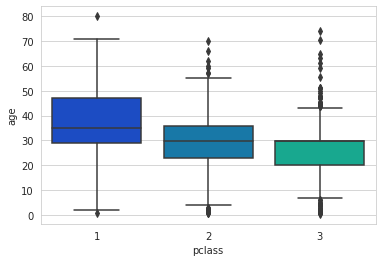

In [ ]:
# #Visualizing numerical variables to check for outliers  
sns.boxplot(x='pclass',y ='age',data=train,palette ='winter') 

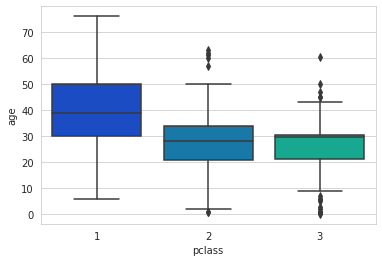

In [ ]:
# #Visualizing numerical variables to check for outliers  
sns.boxplot(x='pclass',y ='age',data=test,palette ='winter')

We onserve similar patterns in both train and test dataset. Its evident that age has outliers in passenger class 2 and 3 and we have individuals who are older in passenger class 1 compared to individuals in passenger class 2 and 3 in both datasets.

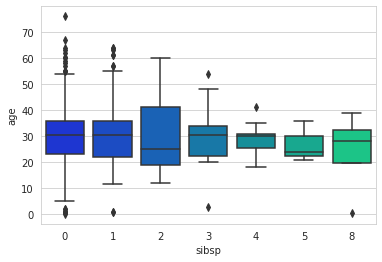

In [ ]:
# #Visualizing numerical variables to check for outliers  
sns.boxplot(x='sibsp',y ='age',data=train,palette ='winter')

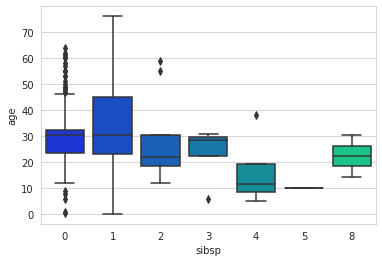

In [ ]:
# #Visualizing numerical variables to check for outliers  
sns.boxplot(x='sibsp',y ='age',data=test,palette ='winter')

We observe outliers in age where we have  zero and 1 spouse and children in the training dataset and those with 0 sibling or spouse in train dataset.

Among our variables, age is the only one that seem to have outliers. This is an important factor in influencing our target. 

# 5. Univariate and Bivariate analysis

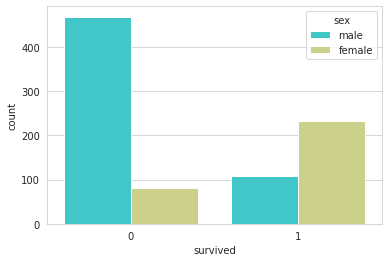

In [ ]:
# Plotting the count of those who survived based on gender
#Plotting count plots
sns.set_style('whitegrid')
sns.countplot (x='survived', hue = 'sex',data=train, palette='rainbow')


We observe that more than 400 males did not survive while the number of female who did nit survive is way less, below 100. The number of females who survived is also higher than that of males. slighly above 200 female survives and about 100 males survived.

This may imply that male put their life on the line for the female. There is  also an aspect of imbalnced data.

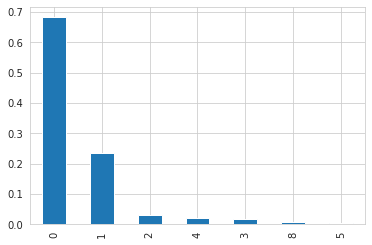

In [ ]:
# Plotting percentage of respondents based on their status

(train['sibsp'].value_counts()/len(train)).plot.bar()

We observe that we have close to 70% of passengers who did not have spouse or children. Passengers slighly above 20% had a spouse or a child and below 3% had 2,3 and 4.

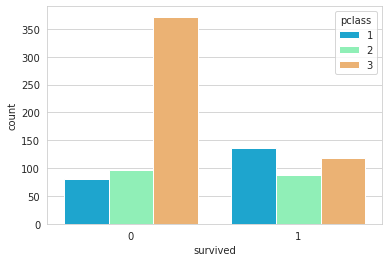

In [ ]:
# Plotting the count of those who survived based on gender

sns.set_style('whitegrid')
sns.countplot (x='survived', hue = 'pclass',data=train, palette='rainbow')

We observe that we have high number of individuals who did not survive that were in passenger class 3, this could be the lowest class with minimal previledges. Then we have fewer individuals who did not survive from passenger class 1. This is the most prestigious class and it is evident that we had more passengers from class 1 surviving. This implies that they were given priority with the lifeboats and other emergency equipments.

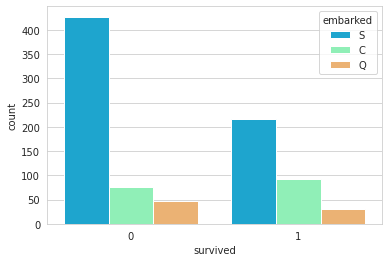

In [ ]:
# Plotting the count of those who survived based port of embarkment

sns.set_style('whitegrid')
sns.countplot (x='survived', hue = 'embarked',data=train, palette='rainbow')

We observe that high number of passengers from S = Southampton port of emberkation did not survive and fewer from Q = Queenstown. 


In [ ]:
#Calculating range between minimum and maximum age 
train_max = train["age"].max()
train_min = train["age"].min()

print(train_max)
print(train_min)

# Calculating the range
range_age =train_max - train_min
print(range_age)


80.0
0.42
79.58


In [ ]:
#Calculating range between minimum and maximum age 
test_max = test["age"].max()
test_min = test["age"].min()

print(test_max)
print(test_min)

# Calculating the range
range_age =test_max - test_min
print(range_age)

76.0
0.17
75.83


train dataset

We have minimum age of less than one year, this could be infants who were on board. Maximum age is 80 years hence the high range of 79.58.

test dataset
We have minimum age of less than one year, this could be infants who were on board. Maximum age is 76 years hence the high range of75.83

we note that the features in the 2 datasets do not vary too much

In [ ]:
#Checking skewness
train["age"].skew() 


0.4344880940129925

Age is positively skewed

In [ ]:
#Checking summary statistics for respondent's age
train["age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

We have 29.7 as the mean age and a standard deviation of 13 indicating high variance for this variable.

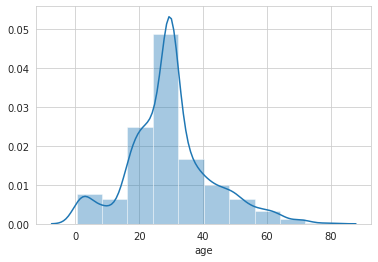

In [ ]:
# Ditribution plot for age
sns.distplot(train['age'], bins=10) 

We observe age follows a normal distribution which is skewed to the right, Most passangers were within the age of 20-40years of age.

# 6. Multivariate analysis

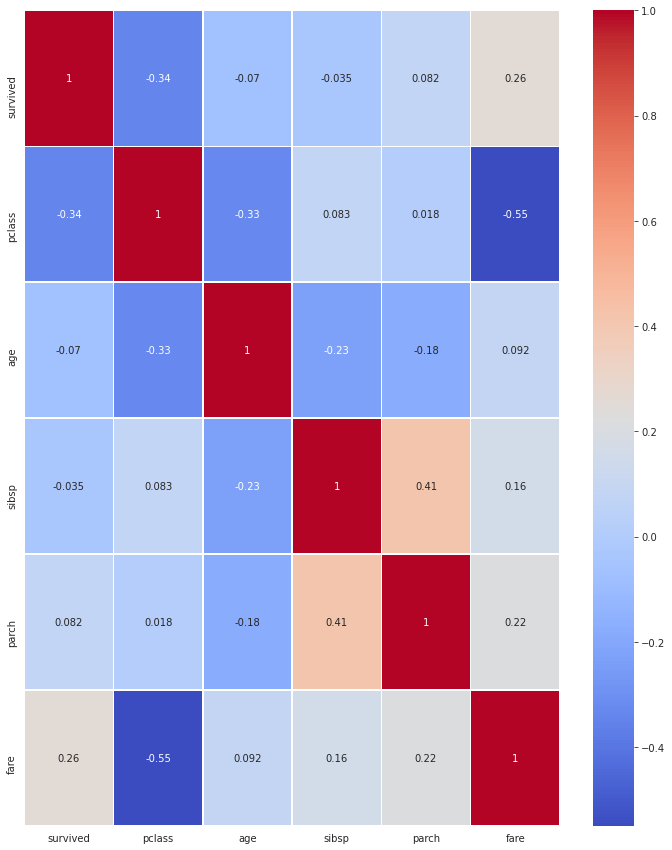

In [ ]:

# Correlation matrix to check relationship of different variables

train_corr = train.corr()
plt.figure(figsize=(12,15))

# We then plot our heatmap visualistion
import seaborn as sns
sns.heatmap(train_corr, annot=True, linewidth=0.5, cmap='coolwarm');

We observe a positive correlation of 0.55 between the passenger class and the fare. This makes alot of sense as the more prestigious the class the higher the fare. Most of the correlation among the variables are below this value. 

i) Checking Multicollinearity

This is to help us asssess if there is multicollinearity expressed among our independent variables.

In [ ]:
# get the correlation of our variables
corr = train.corr()

pd.DataFrame(np.linalg.inv(train.corr().values), index = corr.index, columns=corr.columns)

,survived,pclass,age,sibsp,parch,fare
survived,1.197125,0.425511,0.244349,0.116085,-0.089220,-0.095825
pclass,0.425511,1.804657,0.499732,-0.107711,-0.124163,0.880457
age,0.244349,0.499732,1.244878,0.209250,0.097764,0.043195
sibsp,0.116085,-0.107711,0.209250,1.285520,-0.456860,-0.214667
parch,-0.089220,-0.124163,0.097764,-0.456860,1.272039,-0.256331
fare,-0.095825,0.880457,0.043195,-0.214667,-0.256331,1.594209


We Observe that VIF scores are below 5 this is within the range, there is therefore no multicollinearity among our independent variables.




ii) Encoding categorical features in train and test datasets

In [ ]:
#Encoding categorical features in the train dataset
train["sex"] = np.where(train["sex"].str.contains("male", "female"), 1, 0)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
#Encoding categorical features in the test dataset
test["sex"] = np.where(test["sex"].str.contains("male", "female"), 1, 0)
test.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S


In [ ]:
#Encoding categorical features in the train dataset
embarked = pd.get_dummies(train['embarked' ],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
#Dropping the column from the train dataset
train.drop(['embarked'],axis=1,inplace=True)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [ ]:
#Concat the encoded column and create a clean train copy
train_clean = pd.concat([train,embarked],axis=1)
train_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [ ]:
#Encoding categorical features in the train dataset
embarked = pd.get_dummies(test['embarked' ],drop_first=True)
embarked.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [ ]:
#Dropping the column from the train dataset
test.drop(['embarked'],axis=1,inplace=True)
test.head()

,pclass,sex,age,sibsp,parch,fare
0,3,1,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [ ]:
#Concat the encoded column and create a clean test copy
test_clean = pd.concat([test,embarked],axis=1)
test_clean.head()

,pclass,sex,age,sibsp,parch,fare,Q,S
0,3,1,34.5,0,0,7.8292,1,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,1


iii) Dimensionality Reduction with Linear Discriminant Analysis

LDA is one of the methods that can be applied to optimize performance of KNN algorothim as it supports in dimensionality reduction as one can identify the key features that most influence the chances of a passenger surviving or not surviving.

In [ ]:
# dividing dataset into feature set and corresponding labels

X = train_clean.drop(['survived'], axis=1)

y = train_clean['survived']

# splitting the data into train and test sets
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# normalizing our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# applying Principle Component Analyis
# importing pca
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# printing factors that affect the price of a house in order of how much weight each of the factors carry 
factors = pd.DataFrame (index = X.columns.values, data = lda.coef_[0].T)
# pd.options.display.float_format = '{:.8f}'.float_format
factors.sort_values(0, ascending = False)

,0
parch,2.267384e-01
Q,1.823781e-01
fare,1.118853e-01
sex,4.683452e-16
S,-2.099567e-01
sibsp,-2.415878e-01
age,-5.676758e-01
pclass,-9.210799e-01


We observe that parch, Q(a passenger class), fare and  sex the top 4 influecers of chances of a passenger surviving or not.

The bottom 3 features are pclass,age and if they had siblings or/and spouse.

# 7.Implementing the models

i) KNN 80 - 20 split sets with all the features.

In [ ]:
# Splitting our dataset into its attributes and labels

X = train_clean.drop('survived', axis=1)
y = train_clean['survived']

# Train Test Split of 80/20 sets with k=5 applied

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Feature Scaling
#Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Training the model
#initialized with one parameter, i.e. n_neigbours=5. 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)
                            
#Evaluating the Algorithm 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

0.7374301675977654
[[94 20]
 [27 38]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       114
           1       0.66      0.58      0.62        65

    accuracy                           0.74       179
   macro avg       0.72      0.70      0.71       179
weighted avg       0.73      0.74      0.73       179



Our model achieved accuracy of 73.74% with the 80-20 sets and with K-value of 5

ii) KNN 70 - 30 split sets with all the features.

In [ ]:
# Splitting our dataset into its attributes and labels

X = train_clean.drop('survived', axis=1)
y = train_clean['survived']


# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature Scaling by standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Training the algorithim
#initialized k=5 i.e. n_neigbours. 
#
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)
                            
#Evaluating the Algorithm 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

0.6865671641791045
[[123  34]
 [ 50  61]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.75       157
           1       0.64      0.55      0.59       111

    accuracy                           0.69       268
   macro avg       0.68      0.67      0.67       268
weighted avg       0.68      0.69      0.68       268



Our model achieved an accuracy of 68.6% with a 70-30 sets, this is lower than what we achieved with 80-20 sets

iii)KNN with 60-40 sets with all the features.

In [ ]:
# Splitting our dataset into its attributes and labels

X = train_clean.drop('survived', axis=1)
y = train_clean['survived']
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Training and Predictions
#initialized with one parameter, i.e. n_neigbours. 
#
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)
                            
#Evaluating the Algorithm 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

0.7030812324929971
[[177  39]
 [ 67  74]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       216
           1       0.65      0.52      0.58       141

    accuracy                           0.70       357
   macro avg       0.69      0.67      0.68       357
weighted avg       0.70      0.70      0.70       357



Our model achieved an accuracy of 70.3% with a 60-40 sets, this is higher than what we achieved with 80-20 sets, but so far the 80-20 sets gave us better accuracy of 73.74%

iv)Determining the k-value  to apply in KNN

In [ ]:
#We will standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_clean.drop('survived',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_features = scaler.transform(train_clean.drop('survived',axis=1))

train_feat = pd.DataFrame(scaled_features,columns=train_clean.columns[:-1])
train_feat.head()

,survived,pclass,sex,age,sibsp,parch,fare,Q
0,0.827377,0.0,-0.592481,0.432793,-0.473674,-0.502445,-0.307562,0.619306
1,-1.566107,0.0,0.638789,0.432793,-0.473674,0.786845,-0.307562,-1.614710
2,0.827377,0.0,-0.284663,-0.474545,-0.473674,-0.488854,-0.307562,0.619306
3,-1.566107,0.0,0.407926,0.432793,-0.473674,0.420730,-0.307562,0.619306
4,0.827377,0.0,0.407926,-0.474545,-0.473674,-0.486337,-0.307562,0.619306


In [ ]:
#Creating a range of values to determine the optimal k-value
accuracy_rate = [] 

for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,train_feat,train_clean['survived'],cv=10)
    accuracy_rate.append(score.mean())


Text(0, 0.5, 'accuracy_rate')

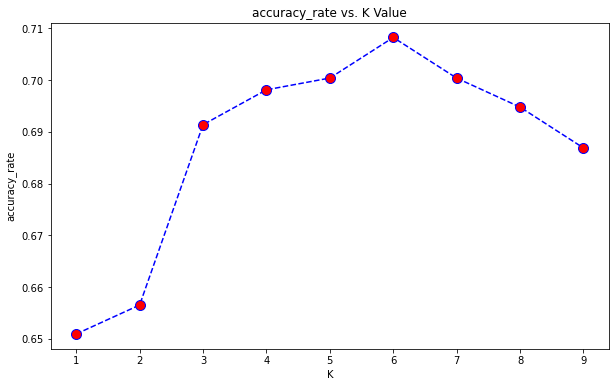

In [ ]:
#Plotting accuracy rate Vs a vis k-value

plt.figure(figsize=(10,6))
plt.plot(range(1,10),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy_rate')

From the above we can observe that value of k with the highest accuracy rate is 6. We will apply this as we oprimize the model and evaluate the performance as beyond this value the accuracy is dropping.


v) Model with optimal value of k-6 with all the features.

In [ ]:
# Splitting our dataset into its attributes and labels

X = train_clean.drop('survived', axis=1)
y = train_clean['survived']
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=10, test_size=0.20)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Training the model
#initialized with optimal k value which is k=6
#
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)
                            
#Evaluating the Algorithm 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

0.7262569832402235
[[97 20]
 [29 33]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       117
           1       0.62      0.53      0.57        62

    accuracy                           0.73       179
   macro avg       0.70      0.68      0.69       179
weighted avg       0.72      0.73      0.72       179



Our model achieved an accuracy of 72.7% after applying the optimal k-value, this is slightly lower than the  73.74% accuracy we got with the 80-20 split.

vi)Optimizing KNN algorithim rescale and get best params

In [ ]:
# optimizing the algorithim by rescale our data, we will apply normalize() method
normal = Normalizer()
X_train = normal.fit_transform(X_train)
X_test = normal.transform(X_test)

# We have already determined the optimal value of k=6
#We will check the rest of the other parameters
knn = KNeighborsClassifier()

params = {'n_neighbors' : [6],
         'weights' : ['distance','uniform',],
         'metric' : ['euclidean','manhattan', 'minkowski']}

#We will cross validate using 10 folds and use RandomSearchCv to search for best parameters
kfolds = KFold(n_splits = 10)

search = RandomizedSearchCV(knn, params, cv=kfolds,random_state = 12)
search.fit(X_train, y_train)
print("Best parameters:", search.best_params_)

# Implementing the recommended best parameters and assess accuracy
classifier = KNeighborsClassifier(n_neighbors = 6, weights = 'distance', metric = 'manhattan')
classifier.fit(X_train, y_train)

# To make predictions
y_pred = classifier.predict(X_test)

# Evaluating the algorithm using the metrics below
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters: {'weights': 'uniform', 'n_neighbors': 6, 'metric': 'manhattan'}
Accuracy score: 0.6190476190476191
[[159  57]
 [ 79  62]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       216
           1       0.52      0.44      0.48       141

    accuracy                           0.62       357
   macro avg       0.59      0.59      0.59       357
weighted avg       0.61      0.62      0.61       357



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


We note that our model performance reduced 61.9% but we nite that there are more individuals who are classified right as the confusion matrix indicates a 159 true positives and 62 true negatives comoared to 94 true positives and 38 true negatives achieved by the 80-20 set.So as much as the accuracy is low, more individuals have been classified right. 

vii)Implementing KNN with top 4 features and best params

In [ ]:
#We will implement KNN using the top 4 features we identified thriugh LDA to assess how our model performs
#Splitting our dataset into its attributes and labels

X = train_clean[['parch',	'fare','Q','sex']].values
y = train_clean['survived'].values


# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Feature Scaling
#Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Training the model
#initialized with optimal k value which is k=6
#
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, weights = 'distance', metric = 'manhattan')
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)
                            
#Evaluating the Algorithm 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.664804469273743
[[81 28]
 [32 38]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       109
           1       0.58      0.54      0.56        70

    accuracy                           0.66       179
   macro avg       0.65      0.64      0.64       179
weighted avg       0.66      0.66      0.66       179



We note that accuracy of our model did not improve when we applied top 4 features that influence chance of surving or not surviving. It is better to model with all the features since they gave us higher performance.

#8.Challenging the solution
The model that performed best was was KNN with 80-20 split and all features applied with accuracy score of 73.47%. I expected better performance when I applied the optimal value of k, and factoring the best parameters, but the accuracy dropped when this was done.

To challenge this outcome, we will model using classifiers as below and establish if there is one that can out perform KNN. 

a)Logistic Regression Classifier

b)Decision Tree Classifier

c)SVM Classifier

d)Naive Bayes Classifier


In [ ]:
# Preparing our dataset for training
# Splitting our dataset into its attributes and labels

X = train_clean.drop('survived', axis=1)
y = train_clean['survived']

# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Feature Scaling
# We import our scaler from sklearn
from sklearn.preprocessing import StandardScaler

# We make an instance sc_X of the object StandardScaler
sc_X = StandardScaler()

# We then fit and transform X_train and X_test
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Compare how different algorithims perform.

from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.svm import SVC                         # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier


# Instantiate the 4 classifiers 

logistic_classifier = LogisticRegression(random_state = 0, solver='lbfgs')
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
naive_classifier = GaussianNB()

# fit our data, X_train and y_train in our models
#
logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)

 #Predicting the results

logistic_y_prediction = logistic_classifier.predict(X_test) 
decision_y_prediction = decision_classifier.predict(X_test) 
svm_y_prediction = svm_classifier.predict(X_test) 
naive_y_prediction = naive_classifier.predict(X_test)


# We import evaluation metrics to determine the accuracy of classifiers
#We will use the accuracy score
from sklearn.metrics import classification_report, accuracy_score 


print(accuracy_score(logistic_y_prediction, y_test))
print(accuracy_score(decision_y_prediction, y_test))
print(accuracy_score(svm_y_prediction, y_test))
print(accuracy_score(naive_y_prediction, y_test))


0.7533632286995515
0.6457399103139013
0.7130044843049327
0.7130044843049327


From the accuracy scores we get 75.3%, 64.5%, 71.3%,  and 71.3% respectively.
The most accurate classifier being Logistic clasifier with a 75.3% accuracy score, it performed slightly better than KNN with 80-20 set which achieved accuracy score of 73.47

we therefore recommend Logistic classifier as has achieved higher accuracy.

# 9. Follow up questions

### a). Did we have the right data?

Yes, we had the right data

### b). Do we need other data to answer our question?

No, since the dataset as it had sufficient information about the passengers who were on board the Titanic.





### c). Did we have the right question?

Yes, we had the right question.